<a href="https://colab.research.google.com/github/SVJLucas/GraphMining/blob/main/GNN/LastDeliver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GRAPH - Graph Mining - CS - PARIS - SACLAY (2023-2024)

## Professor: Nacéra Seghouani
### Students: Lucas J. Velôso  and Paul Canal

# Installing packages

In [213]:

!pip uninstall python-louvain
!pip install -U python-louvain

Found existing installation: python-louvain 0.16
Uninstalling python-louvain-0.16:
  Would remove:
    /usr/local/bin/community
    /usr/local/lib/python3.10/dist-packages/community/*
    /usr/local/lib/python3.10/dist-packages/python_louvain-0.16.dist-info/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.10/dist-packages/community/app.py
Proceed (Y/n)? y
  Successfully uninstalled python-louvain-0.16
  Using cached python_louvain-0.16-py3-none-any.whl


# Downloading the Data

## Downloading

In [1]:
import os

# Function to download a file using wget
def download_file(url: str, destination_folder: str) -> None:
    """
    Downloads a file from the specified URL into the destination folder using wget.

    Args:
        url: The URL of the file to download.
        destination_folder: The folder where the file should be saved.

    Returns:
        None
    """
    # Ensure the destination folder exists
    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder)

    # Construct the command to download the file
    command = f"wget -P {destination_folder} {url}"

    # Execute the download command
    os.system(command)
    print('Download completed successfully!!')

# Example usage
file_url = "http://snap.stanford.edu/biodata/datasets/10012/files/DG-AssocMiner_miner-disease-gene.tsv.gz"
destination = "/content/"

download_file(file_url, destination)


Download completed successfully!!


## Opening the .zip

In [2]:
import gzip
import os

def extract_gz_to_folder(gz_path: str, output_folder: str) -> None:
    """
    Extracts the contents of a .gz file and saves it to a specified folder.

    Args:
        gz_path: The file path of the .gz file to be extracted.
        output_folder: The folder path where the extracted file will be saved.

    Returns:
        None
    """
    # Ensure the output folder exists
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Define the output file name based on the .gz file
    output_file_path = os.path.join(output_folder, os.path.basename(gz_path).replace('.gz', ''))

    # Open the .gz file and create a new file in the output folder
    with gzip.open(gz_path, 'rb') as gz_file:
        with open(output_file_path, 'wb') as output_file:
            # Copy the decompressed content to the new file
            output_file.write(gz_file.read())

    print('The .gz was read successfully!!')

extract_gz_to_folder('/content/DG-AssocMiner_miner-disease-gene.tsv.gz', '/content/data')


The .gz was read successfully!!


# Opening the data

In [3]:
import networkx as nx
from collections import defaultdict

def create_graph_from_tsv(filepath: str, num_nodes_to_consider: int) -> nx.Graph:
    """
    Reads a TSV file with edge list and creates a graph using NetworkX, considering only nodes up to a specified number.

    The TSV file is expected to have two columns with no header, where each row represents an edge between two nodes.

    Args:
        filepath: The path to the TSV file containing the edge list.
        num_nodes_to_consider: The maximum node number to include in the graph.

    Returns:
        A NetworkX graph object created from the edge list in the TSV file, considering only the specified nodes.
    """
    # Create a new graph
    G = nx.Graph()

    num_d = defaultdict(int)
    num_g = defaultdict(int)
    first_row = True
    # Open the TSV file and read lines
    with open(filepath, 'r') as file:
        for line in file:
            # Split each line into source and target node by tab
            source,_, target = line.strip().split('\t')
            if first_row:
                first_row=False
                continue
            if source not in num_d:
              num_d[source]=len(num_d)
            if target not in num_g:
              num_d[target]=len(num_g)
            # Here, convert source and target to integers or leave as strings based on your file's format
            # If your node identifiers are not integers, remove the int() conversion
            source, target = num_d[source], num_d[target]  # Adjust this line as needed
            # Check if both nodes are within the specified limit
            if source <= num_nodes_to_consider and target <= num_nodes_to_consider:
                # Add edge to the graph
                G.add_edge(source, target)

    return G


In [4]:
import networkx as nx
from collections import defaultdict

def create_hetero_graph_from_tsv(filepath: str, num_nodes_to_consider: int) -> nx.Graph:
    """
    Reads a TSV file with edge list and creates a heterogeneous graph using NetworkX, considering only nodes up to a specified number.

    The TSV file is expected to have two columns with no header, where each row represents an edge between two nodes of different categories.

    Args:
        filepath: The path to the TSV file containing the edge list.
        num_nodes_to_consider: The maximum node number to include in the graph.

    Returns:
        A NetworkX graph object created from the edge list in the TSV file, considering only the specified nodes, with node categories.
    """
    # Create a new graph
    G = nx.Graph()

    num_d = defaultdict(int)  # For diseases
    num_g = defaultdict(int)  # For genes
    first_row = True

    # Open the TSV file and read lines
    with open(filepath, 'r') as file:
        for line in file:
            # Skip header
            if first_row:
                first_row = False
                continue
            source, _, target = line.strip().split('\t')

            # Update disease and gene mappings
            if source not in num_d:
                num_d[source] = 2*len(num_d) + 1  # Avoid 0 index
            if target not in num_g:
                num_g[target] = 2*len(num_g) + 2  # Avoid 0 index

            # Map to integers
            source_id, target_id = num_d[source], num_g[target]

            # Check if both nodes are within the specified limit
            if source_id <= num_nodes_to_consider and target_id <= num_nodes_to_consider:
              # Add nodes with their category if they haven't been added yet
              if source_id not in G:
                  G.add_node(source_id, category='disease')
              if target_id not in G:
                  G.add_node(target_id, category='gene')

              # Add edge between source and target
              G.add_edge(source_id, target_id)

    return G, num_d, num_g


In [5]:
import matplotlib.pyplot as plt
import networkx as nx

def plot_hetero_graph(G: nx.Graph) -> None:
    """
    Plots a heterogeneous NetworkX graph with nodes colored by their category.

    Args:
        G: A NetworkX graph object.

    Returns:
        None
    """
    # Color map based on the node category attribute
    color_map = ['blue' if G.nodes[node].get('category') == 'disease' else 'red' for node in G]

    # Draw the graph
    nx.draw(G, with_labels=False, node_color=color_map, edge_color='gray', node_size=10)

    # Show the plot
    plt.show()



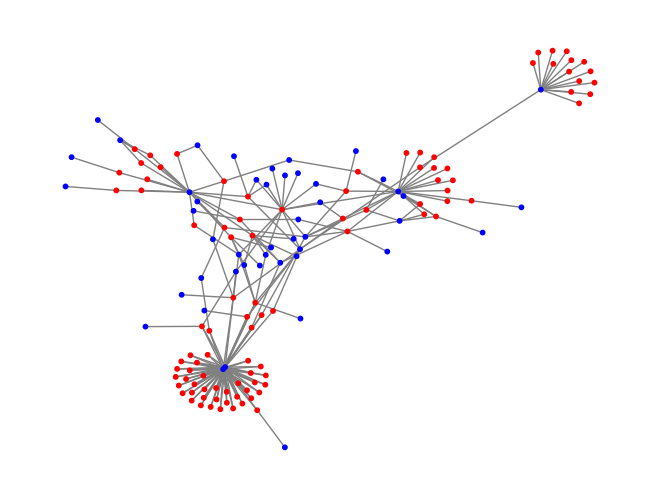

In [15]:
graph, num_d, num_g = create_hetero_graph_from_tsv('/content/data/DG-AssocMiner_miner-disease-gene.tsv', num_nodes_to_consider=191)
plot_hetero_graph(graph)

In [94]:
import pandas as pd

In [95]:
df_disease_final = pd.read_csv('/content/drive/MyDrive/Projetos/GNN-Gene-Disease/Data/processed_data/diseases_table_final.csv')

# First Centrality Analysis



In [53]:
import numpy as np

def sigmoid(x: float) -> float:
    """
    Sigmoid function for normalization.

    Args:
        x: The input value.

    Returns:
        The sigmoid of x.
    """
    return 1 / (1 + np.exp(-x))

def plot_graph_centrality(graph: nx.Graph, centrality: dict, title: str, max_node_size: float = 150, min_node_size: float = 1, cmap=plt.cm.viridis, edge_alpha: float = 0.5, node_alpha: float = 0.9, layout_seed = 2024) -> None:
    """
    Plots the graph with nodes colored according to their centrality values, and sizes adjusted by a sigmoid function.
    Allows for separate transparency settings for nodes and edges.

    Args:
        graph: The graph to be plotted.
        centrality: A dictionary with nodes as keys and centrality values as values.
        title: The title for the plot.
        max_node_size: maximum node size.
        min_node_size: minimum node size.
        cmap: The colormap for node colors.
        edge_alpha: The transparency level for edges.
        node_alpha: The transparency level for nodes.
        layout_seed: The seed for the layout generation to ensure consistent positioning.

    Returns:
        None
    """
    # Normalize centrality values to lie between 0 and 1 for coloring
    max_centrality_value = max(centrality.values())
    centrality_normalized = {node: value / max_centrality_value for node, value in centrality.items()}

    # Generate colors for each node based on centrality
    node_colors = [centrality_normalized[node] for node in graph.nodes()]

    a = 2*(max_node_size-min_node_size)
    b = max_node_size-a
    node_sizes = [a * sigmoid(c / max_centrality_value) + b for c in centrality.values()]

    pos = nx.spring_layout(graph, seed=layout_seed)  # Positions for all nodes

    # Draw the graph with separate transparency for edges and nodes
    plt.figure(figsize=(10, 8))
    # Draw edges with specified edge transparency
    nx.draw_networkx_edges(graph, pos, alpha=edge_alpha, edge_color='gray')
    # Draw nodes with specified node transparency
    nx.draw_networkx_nodes(graph, pos, node_size=node_sizes, node_color=node_colors, cmap=cmap, alpha=node_alpha)

    plt.title(title)
    plt.colorbar(plt.cm.ScalarMappable(cmap=cmap), label='Centrality')
    plt.axis('off')  # Turn off the axis
    plt.show()


## Degree Analysis

<ipython-input-53-0a0a63634119>:55: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap=cmap), label='Centrality')


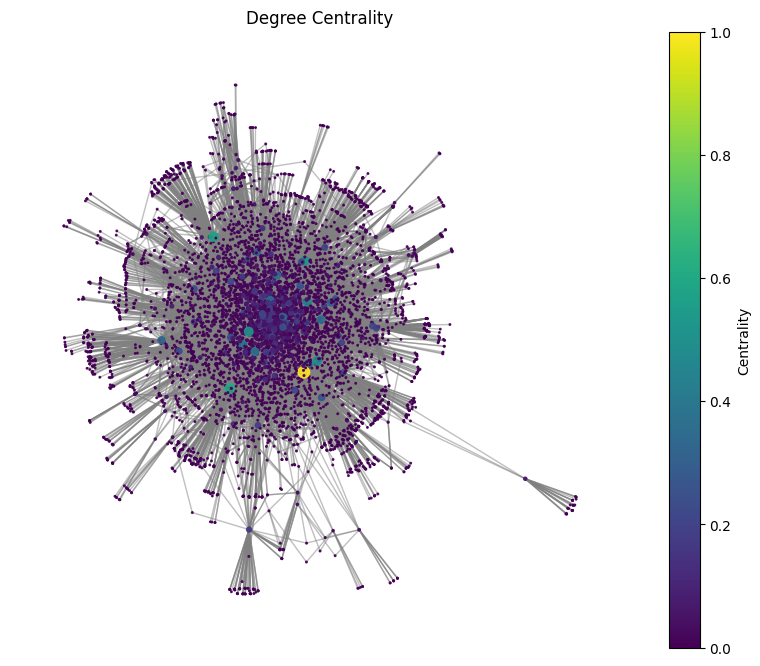

In [136]:
degree_centrality = nx.degree_centrality(graph)
plot_graph_centrality(graph, degree_centrality, 'Degree Centrality')

In [80]:
degree_centrality
even = np.array([1 if i%2 else 0 for i in range(len(degree_centrality))])
odd  = np.array([0 if i%2 else 1 for i in range(len(degree_centrality))])
degree_centrality_arr = np.array(list(degree_centrality.values()))
print(degree_centrality_arr.dot(even))
print(degree_centrality_arr.dot(odd))


3.4920286966919143
3.4585492227979335


In [190]:
import numpy as np

# Sample degree centrality values (hypothetical)

# Convert degree centrality values to array
degree_centrality_arr = np.array(list(degree_centrality.values()))

# Calculate the number of nodes to consider as top 1% (for simplicity in this example, we'll just pick the top node)
num_top_nodes = max(int(len(degree_centrality) * 0.01), 1)

# Sort degree centralities and pick the top 1%
top_degree_centrality_indices = np.argsort(degree_centrality_arr)[-num_top_nodes:]

# Generate even and odd arrays based on the top 1% indices
even = np.array([1 if i % 2 == 0 else 0 for i in range(len(degree_centrality))])
odd = np.array([0 if i % 2 == 0 else 1 for i in range(len(degree_centrality))])

# Filter the even and odd arrays to only include the top 1%
even_top = even[top_degree_centrality_indices]
odd_top = odd[top_degree_centrality_indices]

# Filter the degree centrality array to only include the top 1%
degree_centrality_top = degree_centrality_arr[top_degree_centrality_indices]

# Compute the dot products
dot_product_even = degree_centrality_top.dot(even_top)
dot_product_odd = degree_centrality_top.dot(odd_top)

dot_product_even, dot_product_odd


(0.6600217470097862, 0.7604204421891991)

In [92]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_disease_final[]

In [171]:
num_d_inverse = {value:key for key,value in num_d.items()}
num_g_inverse = {value:key for key,value in num_g.items()}

In [152]:
top_degree_centrality_indices

array([2471, 1335, 5029, 4119,  583, 1085, 5313,  914,   89, 5433,  573,
       1474,   49, 3317,  462,  263, 5429, 5457, 3371, 4798,  167,  476,
        927, 3521,  459, 5341,  250,  660,   45, 1049, 1240, 1177, 3446,
       5273,  565, 2115,  440, 1210,  172, 5462,  758, 2300,  473, 5355,
       5409, 1794, 5384,  102, 3095,  207,   92, 3036, 5296, 5377, 4106,
         34, 5488, 1471,  767, 3585,   90, 5411, 5480, 1419, 5279, 1086,
        996, 1358, 5342, 3679, 1595, 1826, 4592, 5397,  351,  400,  447,
       5381, 1949, 4009,   50, 4514,  625, 4954, 5380, 1513, 5339, 5354,
       1106, 5463, 5505, 1200, 5517, 5468, 5289,   52,  591, 5272, 3686,
        446, 5358, 5328, 5469,   48,  906, 2032, 1667, 5366, 5413, 5291,
        776, 1557, 4428,  121, 5459, 5351, 2482, 1074, 5321, 4578, 5348,
       1427, 2980,  165, 5317, 1193, 4679, 5369, 5299, 1362, 1923, 5335,
        970, 1326,  137, 1439, 1096, 1008, 5395,  585, 5388, 4524,  706,
       4582, 5284,  569, 1089, 4402, 5509,  570,  3

In [129]:
df_disease_final[df_disease_final['Disease ID']==num_d_inverse[363]]['Disease Class'].iloc[0]

'viral infectious disease'

In [165]:
data_final = []

for id in top_degree_centrality_indices:
  if id%2==1 and id<1037:
    try:
      d_type = df_disease_final[df_disease_final['Disease ID']==num_d_inverse[id]]['Disease Class']
      if d_type.any():
        data_final.append(d_type.item())
    except:
      pass

In [167]:
pd.Series(data_final).value_counts()/len(data_final)

nervous system disease                     0.16
cancer                                     0.16
cardiovascular system disease              0.12
viral infectious disease                   0.08
integumentary system disease               0.08
monogenic disease                          0.08
gastrointestinal system disease            0.04
urinary system disease                     0.04
developmental disorder of mental health    0.04
immune system disease                      0.04
chromosomal disease                        0.04
musculoskeletal system disease             0.04
inherited metabolic disorder               0.04
congenital nervous system abnormality      0.04
Name: count, dtype: float64

In [169]:
df_gene = pd.read_csv('/content/drive/MyDrive/Projetos/GNN-Gene-Disease/Data/processed_data/genes_table_final.csv')

In [191]:
data_final = []

for id in top_degree_centrality_indices:
  if id%2==0:
    try:
      d_type = df_gene[df_gene['Gene ID']==int(num_g_inverse[id])]['locus_type']
      if d_type.any():
        data_final.append(d_type.item())
    except:
      pass

In [192]:
data_final

['gene with protein product',
 'gene with protein product',
 'gene with protein product',
 'gene with protein product',
 'gene with protein product',
 'gene with protein product',
 'gene with protein product',
 'gene with protein product',
 'gene with protein product',
 'gene with protein product',
 'gene with protein product',
 'gene with protein product',
 'gene with protein product',
 'gene with protein product',
 'gene with protein product',
 'gene with protein product',
 'gene with protein product',
 'gene with protein product',
 'gene with protein product',
 'RNA, micro',
 'gene with protein product',
 'gene with protein product',
 'RNA, long non-coding',
 'gene with protein product',
 'gene with protein product',
 'gene with protein product',
 'gene with protein product']

In [193]:
pd.Series(data_final).value_counts()/len(data_final)

gene with protein product    0.925926
RNA, micro                   0.037037
RNA, long non-coding         0.037037
Name: count, dtype: float64

In [182]:
num_g_inverse

{2: '1462',
 4: '1612',
 6: '182',
 8: '2011',
 10: '2019',
 12: '2175',
 14: '2195',
 16: '23209',
 18: '23543',
 20: '23619',
 22: '259266',
 24: '2620',
 26: '2621',
 28: '27344',
 30: '2982',
 32: '3485',
 34: '358',
 36: '3691',
 38: '3852',
 40: '3866',
 42: '4082',
 44: '50805',
 46: '51477',
 48: '51514',
 50: '51659',
 52: '5174',
 54: '5176',
 56: '53335',
 58: '54441',
 60: '54531',
 62: '5587',
 64: '57419',
 66: '5834',
 68: '595',
 70: '6484',
 72: '6651',
 74: '6659',
 76: '6664',
 78: '7153',
 80: '80303',
 82: '81029',
 84: '81831',
 86: '9454',
 88: '9700',
 90: '999',
 92: '135',
 94: '1636',
 96: '207',
 98: '2099',
 100: '2912',
 102: '2950',
 104: '3350',
 106: '3362',
 108: '4886',
 110: '4988',
 112: '5245',
 114: '6531',
 116: '6622',
 118: '6648',
 120: '816',
 122: '8787',
 124: '9463',
 126: '3295',
 128: '5189',
 130: '5190',
 132: '5192',
 134: '5193',
 136: '5194',
 138: '5195',
 140: '55670',
 142: '5824',
 144: '5825',
 146: '5828',
 148: '5830',
 150: 

In [183]:
df_gene[df_gene['Gene ID']==2678]

,Unnamed: 0,Gene ID,hgnc_id,name,locus_group,locus_type,location,gene_family,gene_family_id,Start Chromossome,Start Chromossome Arm,Start Chromossome Loc,Start Chromossome SubLoc,End Chromossome Arm,End Chromossome Loc,End Chromossome SubLoc
978,978,2678,HGNC:4250,gamma-glutamyltransferase 1,protein-coding gene,gene with protein product,22q11.23,CD molecules|Gamma-glutamyltransferases,471|564,22.0,q,11.0,23.0,NaN,NaN,NaN


In [170]:
df_gene

,Unnamed: 0,Gene ID,hgnc_id,name,locus_group,locus_type,location,gene_family,gene_family_id,Start Chromossome,Start Chromossome Arm,Start Chromossome Loc,Start Chromossome SubLoc,End Chromossome Arm,End Chromossome Loc,End Chromossome SubLoc
0,0,1462,HGNC:2464,versican,protein-coding gene,gene with protein product,5q14.2-q14.3,Hyalectan proteoglycans|V-set domain containin...,574|590|1179,5.0,q,14.0,2.0,q,14.0,3.0
1,1,1612,HGNC:2674,death associated protein kinase 1,protein-coding gene,gene with protein product,9q34.1,Ankyrin repeat domain containing|Death-associa...,403|1021,9.0,q,34.0,1.0,NaN,NaN,NaN
2,2,182,HGNC:6188,jagged 1,protein-coding gene,gene with protein product,20p12.1-p11.23,CD molecules,471,20.0,p,12.0,1.0,p,11.0,23.0
3,3,2011,HGNC:3332,microtubule affinity regulating kinase 2,protein-coding gene,gene with protein product,11q13.1,NaN,NaN,11.0,q,13.0,1.0,NaN,NaN,NaN
4,4,2019,HGNC:3342,engrailed homeobox 1,protein-coding gene,gene with protein product,2q14.2,NKL subclass homeoboxes and pseudogenes,519,2.0,q,14.0,2.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6943,6943,407037,HGNC:31632,microRNA 320a,non-coding RNA,"RNA, micro",8p21.3,MicroRNAs,476,8.0,p,21.0,3.0,NaN,NaN,NaN
6944,6944,79727,HGNC:15986,lin-28 homolog A,protein-coding gene,gene with protein product,1p35.3,Zinc fingers CCHC-type,74,1.0,p,35.0,3.0,NaN,NaN,NaN
6945,6945,8505,HGNC:8605,poly(ADP-ribose) glycohydrolase,protein-coding gene,gene with protein product,10q11.23,NaN,NaN,10.0,q,11.0,23.0,NaN,NaN,NaN
6946,6946,8668,HGNC:3272,eukaryotic translation initiation factor 3 sub...,protein-coding gene,gene with protein product,1p34.1,WD repeat domain containing|Eukaryotic transla...,362|1121,1.0,p,34.0,1.0,NaN,NaN,NaN


In the graph, we can see that each of the main clusters has a central node. In the graph, the sizes (radii) of the nodes are associated with the centrality value, and the greater the value of the centrality measure, in this case, the degree, the greater the size of the node.

## Louvain Algorithm

This method aims to detect communities by maximizing modularity through a heuristic approach. It's an iterative process that aggregates nodes into communities at various scales. Here, we used due to its hierarchical clustering approach.

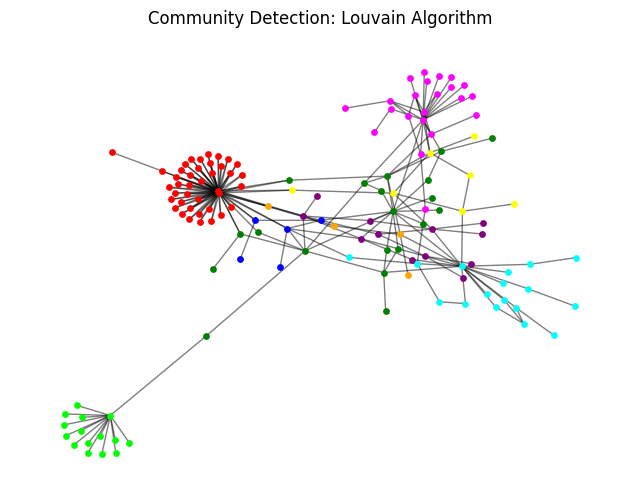

In [16]:
import matplotlib.pyplot as plt
import networkx as nx
import community as community_louvain

# Assuming 'graph' is already defined
# Compute the best partition
partition = community_louvain.best_partition(graph)

# Prepare the figure
plt.figure(figsize=(8, 6))

# Generate positions for all nodes
pos = nx.spring_layout(graph, seed=2024)

# Define your 15 named colors
colors = [
    'red', 'blue', 'green', 'yellow', 'orange',
    'purple', 'cyan', 'magenta', 'lime', 'pink',
    'teal', 'lavender', 'olive', 'brown', 'navy'
]

# Ensure we loop over communities and colors correctly
for i, comm in enumerate(set(partition.values())):
    # List of nodes in the current community
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == comm]
    # Draw nodes with the community-specific color
    nx.draw_networkx_nodes(graph, pos, list_nodes, node_size=15, node_color=colors[i % len(colors)])

# Draw the edges
nx.draw_networkx_edges(graph, pos, alpha=0.5)

# Set the title and show the plot
plt.title("Community Detection: Louvain Algorithm")
plt.axis('off')  # Optional: Hide the axes
plt.show()
